In [1]:
# api key :  f6421f1b168499debde42264d506f60d2e506b9f
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

TIINGO_API_KEY = 'f6421f1b168499debde42264d506f60d2e506b9f'

# This is here to remind you to change your API key.
if not TIINGO_API_KEY or (TIINGO_API_KEY == 'REPLACE-THIS-TEXT-WITH-A-REAL-API-KEY'):
    raise Exception("Please provide a valid Tiingo API key!")

In [3]:
from tiingo import TiingoClient

config = {
    'api_key': TIINGO_API_KEY,
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

In [4]:
ticker_metadata = client.get_ticker_metadata("GOOGL")
print(ticker_metadata)

{'ticker': 'GOOGL', 'name': 'Alphabet Inc - Class A', 'description': "Google Inc. (Google) is a global technology company. The Company's business is primarily focused around key areas, such as search, advertising, operating systems and platforms, enterprise and hardware products. The Company generates revenue primarily by delivering online advertising. The Company also generates revenues from Motorola by selling hardware products. The Company provides its products and services in more than 100 languages and in more than 50 countries, regions, and territories. Effective May 16, 2014, Google Inc acquired Quest Visual Inc. Effective May 20, 2014, Google Inc acquired Enterproid Inc, doing business as Divide. In June 2014, Google Inc acquired mDialog Corp. Effective June 25, 2014, Google Inc acquired Appurify Inc, a San Francisco-based developer of mobile bugging application software.", 'startDate': '2004-08-19', 'endDate': '2023-07-19', 'exchangeCode': 'NASDAQ'}


In [13]:
ticker_metadata_list = [ticker_metadata]
# Crear el DataFrame
df = pd.DataFrame(ticker_metadata_list)

# Establecer la columna 'ticker' como el índice
df.set_index('ticker', inplace=True)
df

,name,description,startDate,endDate,exchangeCode
ticker,,,,,
GOOGL,Alphabet Inc - Class A,Google Inc. (Google) is a global technology co...,2004-08-19,2023-07-19,NASDAQ


In [9]:
ticker_price = client.get_ticker_price("GOOGL", frequency="weekly")
print(ticker_price)

[{'adjClose': 122.03, 'adjHigh': 125.18, 'adjLow': 121.8, 'adjOpen': 124.6, 'adjVolume': 37047538, 'close': 122.03, 'date': '2023-07-19T00:00:00+00:00', 'divCash': 0.0, 'high': 125.18, 'low': 121.8, 'open': 124.6, 'splitFactor': 1.0, 'volume': 37047538}]


In [10]:
ticker_history_df = client.get_dataframe("GOOGL",
                                         startDate='2018-05-15',
                                         endDate='2018-05-31',
                                         frequency='daily')

In [11]:
ticker_history_df.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [12]:
ticker_history_df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2018-05-15 00:00:00+00:00,1084.87,1099.12,1078.78,1096.90,1786926,54.2435,54.9560,53.9390,54.8450,35738520,0.0,1.0
2018-05-16 00:00:00+00:00,1084.09,1094.38,1081.63,1085.09,1281406,54.2045,54.7190,54.0815,54.2545,25628120,0.0,1.0
2018-05-17 00:00:00+00:00,1081.26,1091.00,1076.42,1081.46,1286907,54.0630,54.5500,53.8210,54.0730,25738140,0.0,1.0
2018-05-18 00:00:00+00:00,1069.64,1073.73,1064.68,1066.00,1774149,53.4820,53.6865,53.2340,53.3000,35482980,0.0,1.0
2018-05-21 00:00:00+00:00,1084.01,1093.30,1078.00,1079.00,1258999,54.2005,54.6650,53.9000,53.9500,25179980,0.0,1.0


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

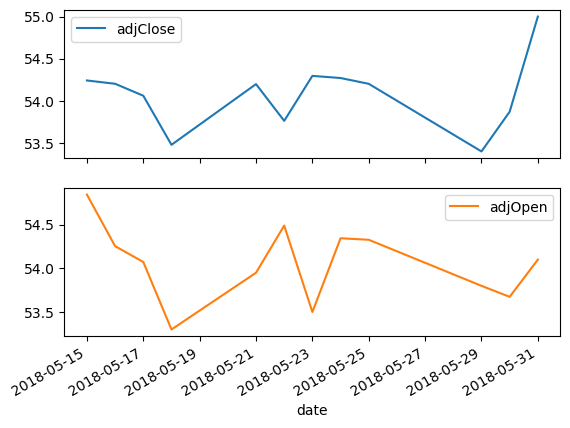

In [14]:
columns_to_plot = ['adjClose', 'adjOpen']
ticker_history_df[columns_to_plot].plot.line(subplots=True)